In [1]:
from Portfolio import Portfolio, universe # universe is a global variable
# and each portfolio can access to the universe
from Admin import Admin, MeanReturn, MoneyWeightedReturn,SimpleReturn,TimeWeightedReturn,Volatility,ReturnAttribCurrency
import pandas as pd


We are in a good state, target weights with short selling returned


([(0.103, 0.065)],
 [{'MRD.TO': 0.07739194719224772,
   'CIM.AX': -0.06368499394986335,
   'GAPSX': 0.19402534951358721,
   'LNC': -0.0549598576098025,
   'KNEBV.HE': 0.06264121355892392,
   'HBD.TO': 0.09742295556192719,
   'HGU.TO': 0.054482565519328625,
   'OIH': -0.07231142008944524,
   'RIT.TO': 0.3599419245398914,
   'EMB': 0.3450503157632052}])

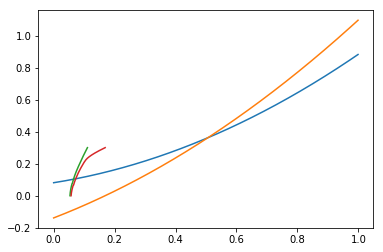

In [2]:
test_admin=Admin()
test_admin.suggestPortfolio('3','2014-04-01')

In [3]:
test_admin.acceptPortfolio(0)

{'MRD.TO': 794.9010635102774,
 'CIM.AX': -669.3251299585438,
 'GAPSX': 2474.583206445954,
 'LNC': -207.10390624819271,
 'KNEBV.HE': 304.54451510968505,
 'HBD.TO': 1023.6988396335904,
 'HGU.TO': 469.9764797526379,
 'OIH': -274.7137017275736,
 'RIT.TO': 7009.389063440637,
 'EMB': 681.0109634328859,
 'DJI_365_17000_P': 12.0}

In [4]:
test_admin.trackPortfolio()
# t_tmp=
# from datetime import datetime
# datetime.strftime(pd.date_range(end='2015-03-01',periods=1,freq='B')[0],'%Y-%m-%d')

In [5]:
test_admin.getAccountValue('2019-06-01')

Deposit-CAD    466882.148912
dtype: float64

In [6]:
# from datetime import datetime
date_format='%Y-%m-%d'
start_date='2014-04-01'
today_date=test_admin.today
# all_dates=[datetime.strftime(item,date_format) for item in pd.date_range(start_date,today_date,freq='M')]
# portf_values=[]
# for item in all_dates:
#     portf_values.append(test_admin.getAccountValue(item))

In [7]:
# from matplotlib import pyplot as plt
# plt.figure(figsize=(10,10))
# plt.plot(all_dates,portf_values)

In [8]:
# print(MeanReturn(test_admin.portfolio,start_date,test_admin.today))
# print(Volatility(test_admin.portfolio,start_date,test_admin.today))

In [9]:
from Admin import PortfolioVaRV2

In [15]:
betas,VAR_test=PortfolioVaRV2(test_admin,start_date,test_admin.today,True)

{'MRD.TO': Deposit-CAD    2686.462389
dtype: float64, 'CIM.AX': Deposit-CAD   -704.895809
dtype: float64, 'GAPSX': Deposit-CAD    3807.727407
dtype: float64, 'LNC': Deposit-CAD   -319.129501
dtype: float64, 'KNEBV.HE': Deposit-CAD    398.001435
dtype: float64, 'HBD.TO': Deposit-CAD    3198.666525
dtype: float64, 'HGU.TO': Deposit-CAD    2395.191859
dtype: float64, 'OIH': Deposit-CAD   -1908.413006
dtype: float64, 'RIT.TO': Deposit-CAD    9537.483042
dtype: float64, 'EMB': Deposit-CAD    1088.467036
dtype: float64, 'DJI_365_17000_P': Deposit-CAD    19.0
dtype: float64}
[[0.0009684480820311646]
 [0.0012118512599723372]
 [0.0023707090098895474]
 [0.0031071643297607802]
 [0.0020772667377761903]
 [0.007191772674989525]
 [0.005160442195555746]
 [0.0036362913599455125]
 [0.0006959870362420746]
 [0.0006454193308088179]
 [0.0049011082475236955]]
[[ 0.07739195]
 [-0.06368499]
 [ 0.19402535]
 [-0.05495986]
 [ 0.06264121]
 [ 0.09742296]
 [ 0.05448257]
 [-0.07231142]
 [ 0.35994192]
 [ 0.34505032]
 

In [11]:
betas

,Mkt-RF_log,SMB_log,HML_log,RMW_log,CMA_log,Mkt-RF_log_global,SMB_log_global,HML_log_global,RMW_log_global,CMA_log_global,...,US IG 5-10 yr,CGOV 10y,CGOV 5y,CGOV 2y,Gold,Crude Oil,US Real Estate,CAN Real Estate,Toronto Real Estate,VIX
MRD.TO,0,0,0,0,0,0.181109,-0.11905,-0.0622143,-0.589342,-0.541585,...,0,0,0,0,0,0,0,0,0,0
CIM.AX,0,0,0,0,0,0.366193,-0.631117,0.502701,-0.221197,-0.717091,...,0,0,0,0,0,0,0,0,0,0
GAPSX,0.990506,-0.0847546,0.0979517,0.08088,0.0194918,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LNC,1.54335,0.0722288,1.39972,-0.623523,-0.708468,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
KNEBV.HE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HBD.TO,0,0,0,0,0,0,0,0,0,0,...,-0.00778484,-0.138415,0.15594,0.0120714,-0.580562,-0.211411,-0.0604814,-0.0265425,0.0694042,0.0145569
HGU.TO,0,0,0,0,0,0.503353,1.54259,0.180315,-2.30109,-5.3797,...,0,0,0,0,0,0,0,0,0,0
OIH,1.32562,0.0401911,0.500355,0.176235,-0.974842,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RIT.TO,0,0,0,0,0,0.230997,0.0986896,0.0706403,-0.0795889,-0.316355,...,0,0,0,0,0,0,0,0,0,0
EMB,0,0,0,0,0,0,0,0,0,0,...,0.29331,-0.00990348,-0.0538247,0.0238864,0.00718207,0.0137843,0.0537731,0.0358046,0.0162667,-0.0144953


In [12]:
for item in test_admin.PortfolioWeights.keys():
    print(universe.get_security(item).currency)

CAD
AUD
USD
USD
EUR
CAD
CAD
USD
CAD
USD


In [16]:
start_date='2014-04-01'
today_date='2019-06-01'

30806.048385868733

In [17]:
SimpleReturn(test_admin.portfolio,start_date,today_date)

1887


0.18310229559889346

In [19]:
MoneyWeightedReturn(test_admin.portfolio,test_admin.cash_transacs,start_date,today_date)

0.3529559484291919

In [20]:
TimeWeightedReturn(test_admin.portfolio,test_admin.cash_transacs,start_date,today_date)

0.04747881447273761